In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('diabetes.csv')
df.shape

(768, 9)

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()   # data frame에 대한 정보를 볼 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df_null = df.isnull() # True/False 값으로 결측치 확인
df_null.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [5]:
df_null.sum()   # 결측치의 수를 구할 수 있음

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()   # 수치데이터에 대한 요약
# 최소값이 0인 값들은 결측치로 예측할 수 있음

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
feature_columns = df.columns[:-1].tolist() # outcome 제외한 feature를 가져옴

In [8]:
cols = feature_columns[1:]
df_null = df[cols].replace(0, np.nan) # 0인 값은 결측치라 가정
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [9]:
df_null.mean() * 100    # 결측치의 비율

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

<Axes: >

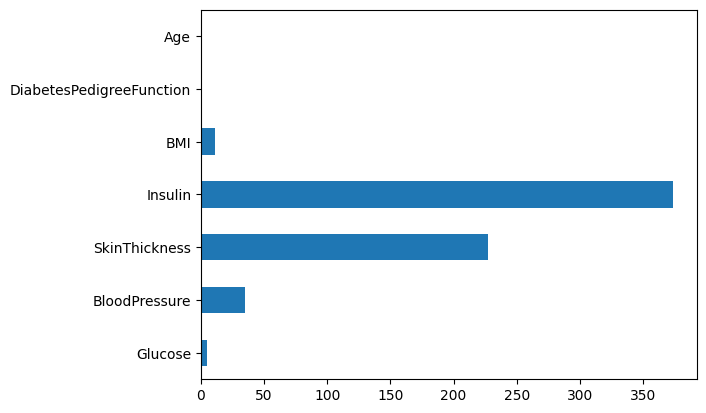

In [10]:
df_null.sum().plot.barh()   # 결측치를 막대그래프로 표현

<Axes: >

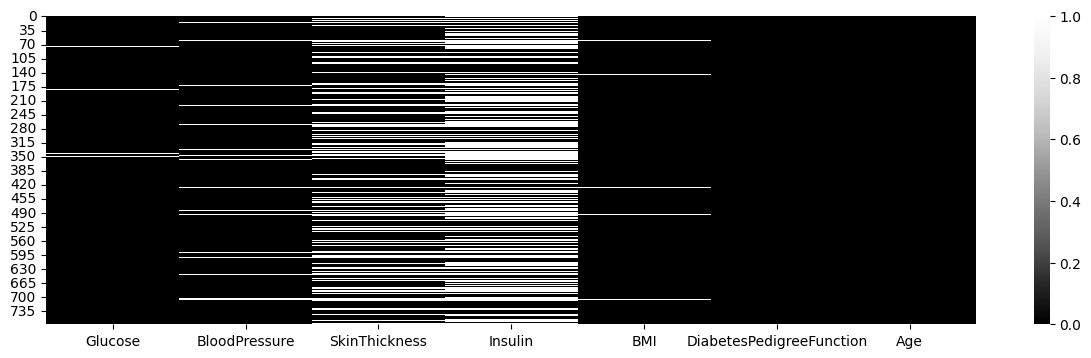

In [11]:
plt.figure(figsize=(15,4))
sns.heatmap(df_null, cmap='Greys_r')    # True값(결측치)은 밝음, False는 검정

In [12]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [13]:
df['Outcome'].value_counts(normalize=True)  # outcome의 비율 확인

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [14]:
df_po = df.groupby(['Pregnancies'])['Outcome'].agg(['mean', 'count']).reset_index() # pregnancies를 column값으로 변경해줌
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


<Axes: >

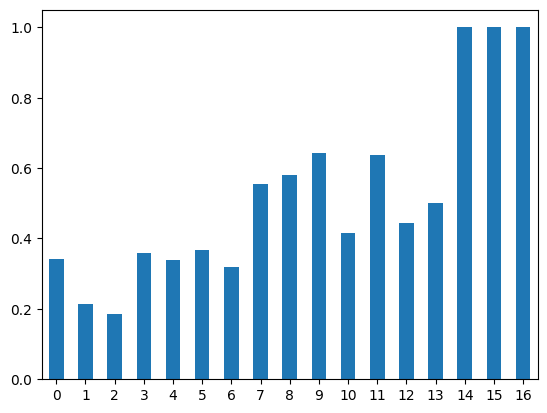

In [15]:
df_po['mean'].plot.bar(rot=0)   # rot = 0은 누워져있는 글씨를 세우는 거임

<Axes: xlabel='Outcome', ylabel='count'>

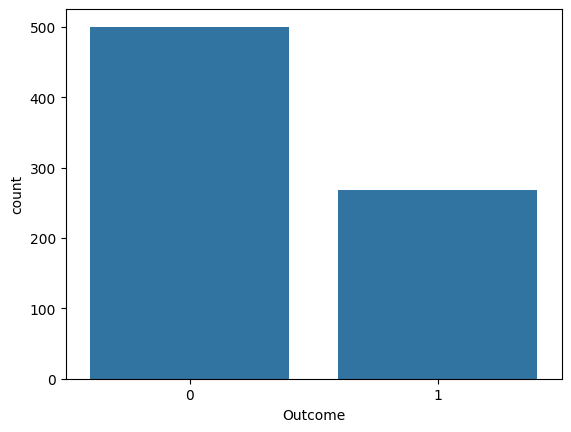

In [16]:
sns.countplot(data=df, x='Outcome')

<Axes: xlabel='Pregnancies', ylabel='count'>

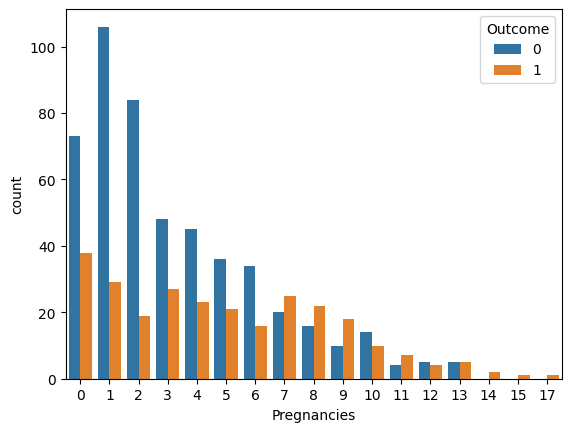

In [17]:
sns.countplot(data=df, x='Pregnancies', hue='Outcome')

In [18]:
df['Pregnancies_high']=df['Pregnancies'] > 6
df[['Pregnancies', 'Pregnancies_high']].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<Axes: xlabel='Pregnancies_high', ylabel='count'>

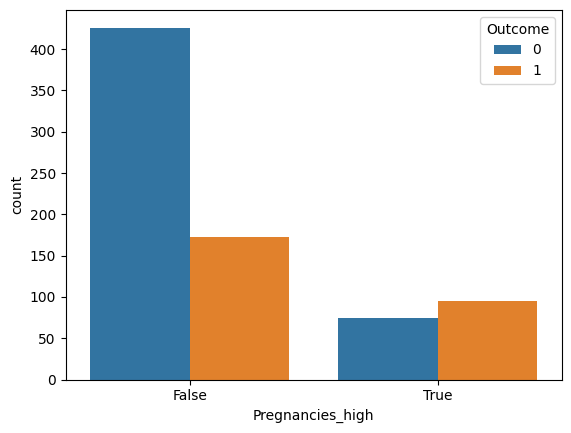

In [19]:
sns.countplot(data=df, x='Pregnancies_high', hue='Outcome')

<Axes: xlabel='Outcome', ylabel='BMI'>

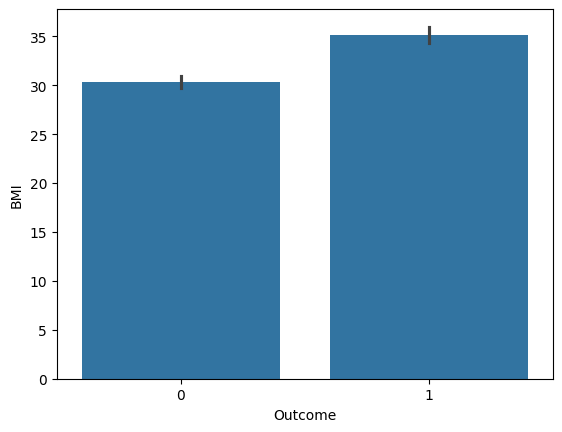

In [20]:
sns.barplot(data=df, x='Outcome', y='BMI')

<Axes: xlabel='Outcome', ylabel='Glucose'>

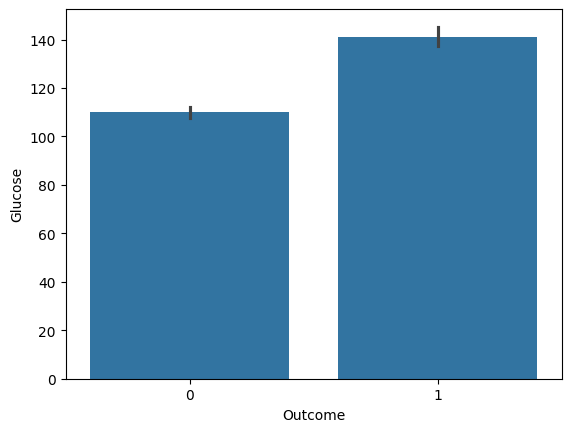

In [21]:
sns.barplot(data=df, x='Outcome', y='Glucose')

<Axes: xlabel='Outcome', ylabel='Insulin'>

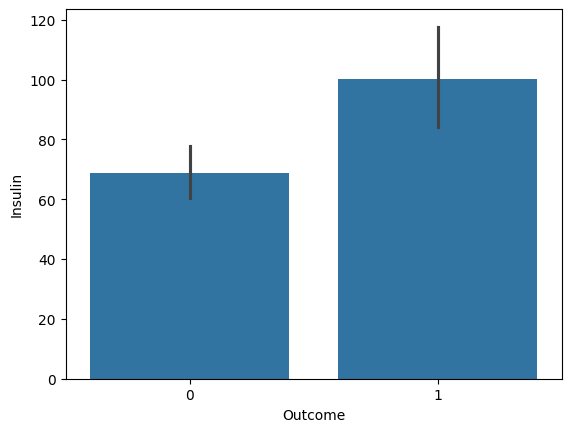

In [22]:
sns.barplot(data=df, x='Outcome', y='Insulin')

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

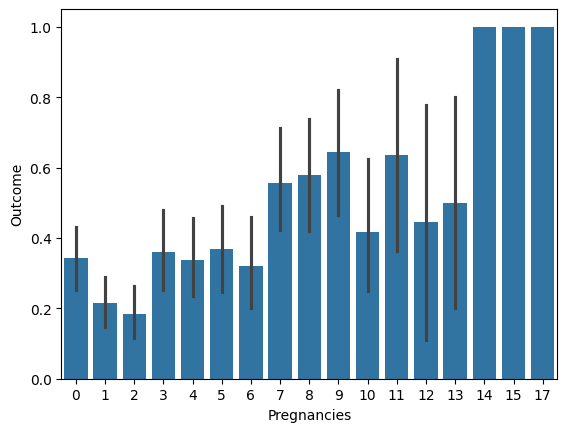

In [23]:
sns.barplot(data=df, x='Pregnancies', y='Outcome')

<Axes: xlabel='Pregnancies', ylabel='Glucose'>

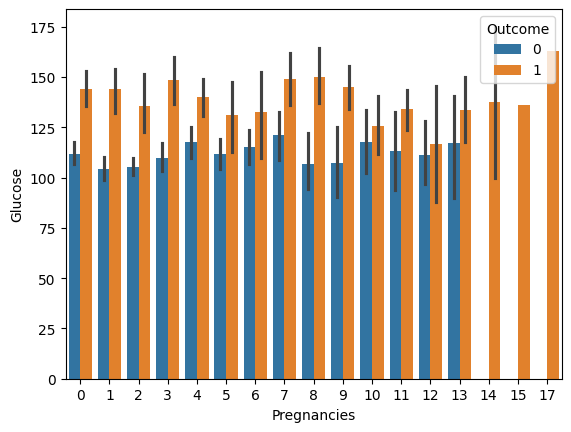

In [24]:
sns.barplot(data=df, x='Pregnancies', y='Glucose', hue='Outcome')

<Axes: xlabel='Pregnancies', ylabel='BMI'>

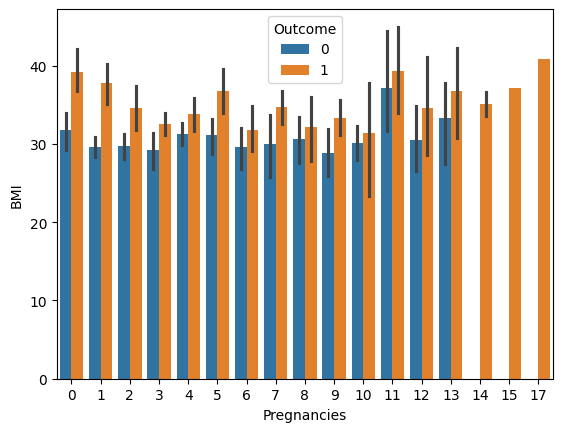

In [25]:
sns.barplot(data=df, x='Pregnancies', y='BMI', hue='Outcome')

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

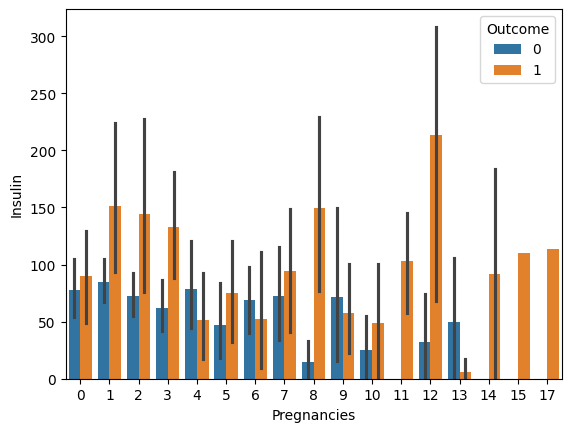

In [26]:
sns.barplot(data=df, x='Pregnancies', y='Insulin', hue='Outcome')

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

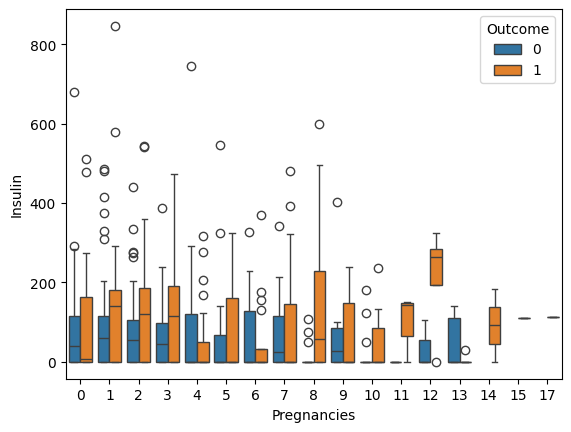

In [27]:
sns.boxplot(data=df, x='Pregnancies', y='Insulin', hue='Outcome')   # insulin값이 0인 값이 많음

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

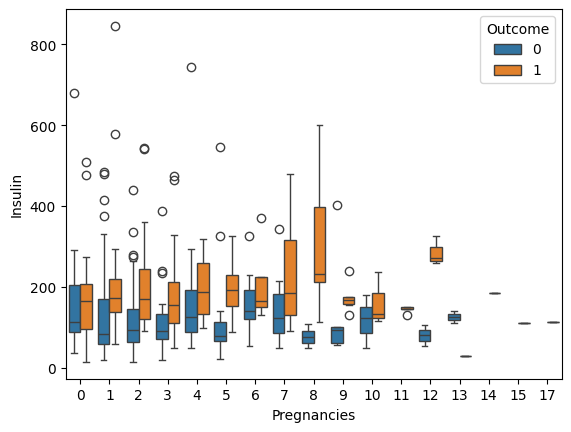

In [28]:
sns.boxplot(data=df[df['Insulin'] > 0], x='Pregnancies', y='Insulin', hue='Outcome')

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

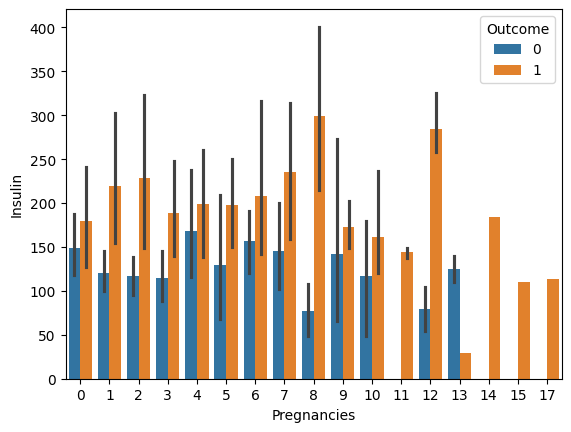

In [29]:
sns.barplot(data=df[df['Insulin'] > 0], x='Pregnancies', y='Insulin', hue='Outcome')

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

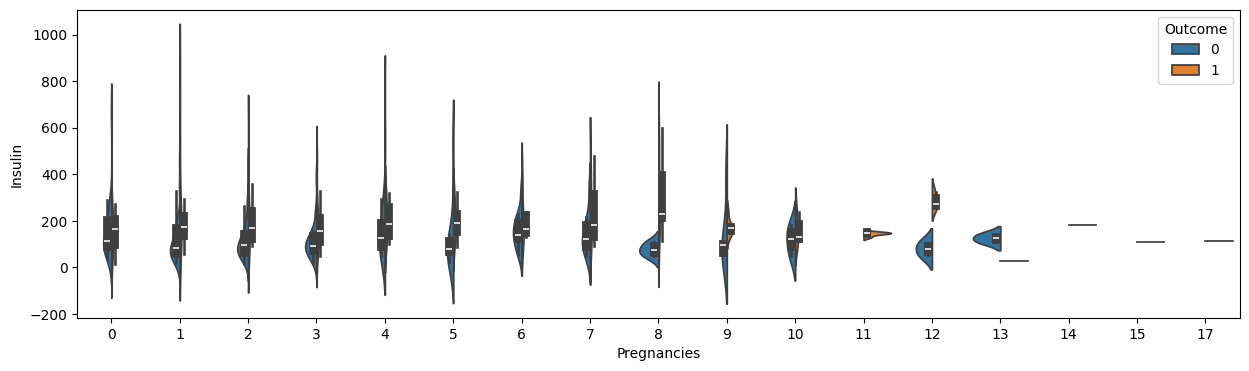

In [30]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df[df['Insulin'] > 0], x='Pregnancies', y='Insulin', hue='Outcome', split=True)

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3398: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3398: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3398: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Pregnancies', ylabel='Insulin'>

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3398: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


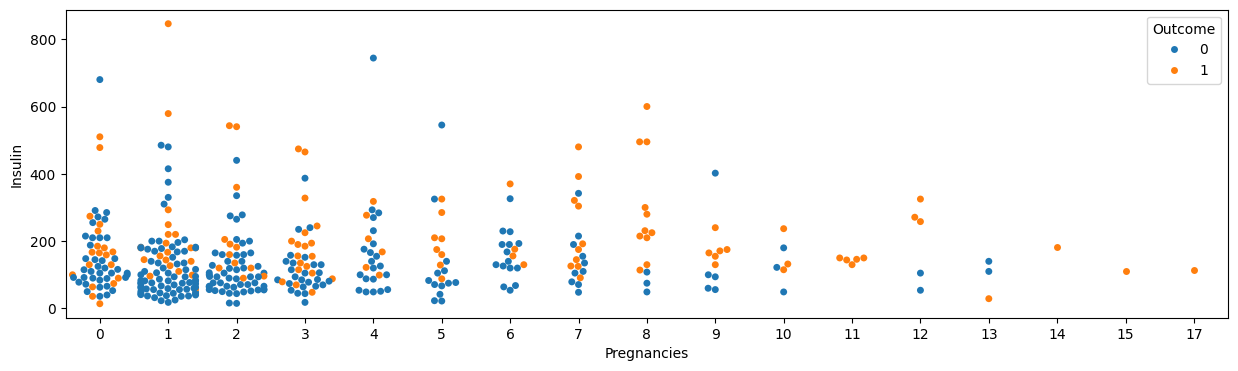

In [31]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df[df['Insulin'] > 0], x='Pregnancies', y='Insulin', hue='Outcome')

In [35]:
df_0 = df[df['Outcome'] == 0]   # 당뇨병 발병 케이스
df_1 = df[df['Outcome'] == 1]   # 당뇨병 발병하지 않는 케이스
df_0.shape, df_1.shape

((500, 10), (268, 10))

/var/folders/jk/f8yz8m0x7sl5ls0qq4fz6fkm0000gn/T/ipykernel_37774/2016012370.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0['Pregnancies'])
/var/folders/jk/f8yz8m0x7sl5ls0qq4fz6fkm0000gn/T/ipykernel_37774/2016012370.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['Pregnancies']

<Axes: xlabel='Pregnancies', ylabel='Density'>

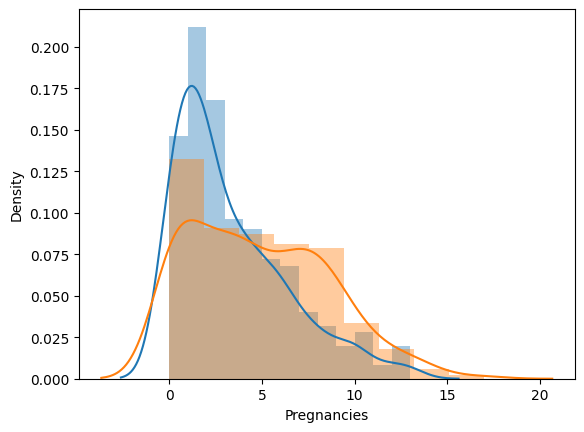

In [36]:
sns.distplot(df_0['Pregnancies'])
sns.distplot(df_1['Pregnancies'])

/var/folders/jk/f8yz8m0x7sl5ls0qq4fz6fkm0000gn/T/ipykernel_37774/2567649008.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0['Age'], hist=False, rug=True, label=0)
/var/folders/jk/f8yz8m0x7sl5ls0qq4fz6fkm0000gn/T/ipykernel_37774/2567649008.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bb

<Axes: xlabel='Age', ylabel='Density'>

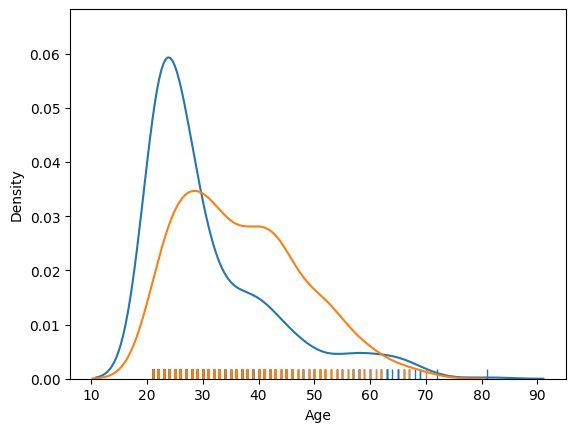

In [42]:
sns.distplot(df_0['Age'], hist=False, rug=True, label=0)
sns.distplot(df_1['Age'], hist=False, rug=True, label=1)